# MARK 3 SIMULATOR
## Developing version

Based on Root, D.H.; W.D. Menzie y W.A. Scott (1992)

Computer Monte Carlo Simulation in Quantitative Resource Estimation. Non Renewable Resources.

### Notes:

> Mark3 is based on a free distribution

> What are the differences between Root et. al (1992) algorithm and Eminers(2003)?

In [17]:
# Visualizations
import matplotlib.pyplot as plt

from scipy.stats import poisson

In [18]:
lang = 'en'
#lang = 'sp'

In [19]:
# Mark3 Mean
def Mark3Mean(n90, n50, n10, n05, n01):
    return 0.233 * n90 + 0.4 * n50 + 0.255 * n10 + 0.045 * n05 + 0.03 * n01

#S
def S(n90, n50, n10, n05, n01):
    return 0.121 - 0.237 * n90 - 0.093 * n50 + 0.183 * n10 + 0.073 * n05 + 0.123 * n01

##  S Numbers

In [20]:
# Los n son número de yacimientos

def s1(n90):
    return 1 + 2 * n90

def s2(n90,n50):
    if n50 == n90:
        result = 1
    elif n50 > n90:
        result = 2 + 2 * ( n50 - n90 - 1)
    
    return result

def s3(n50, n10):
    if n50 == n10:
        result = 1
    elif n10 > n50:
        result = 2 + 2 * ( n10 - n50 - 1)
    
    return result

## Probabilities p(n)

90, 50, 10 percentiles Could represent a default distribution.

If default distribution is not used a new distribution can be choosed by:

* Approximating a lognormal distripution for grades and tonnes.

* Approximating piecewise linear distributions (empirical option).

In [21]:
def depProb(nYac,n90,n50,n10):
    # .1 .4 are the p90, p10 probabilities around p50
    
    ns1 = s1(n90)
    ns2 = s2(n90, n50)
    ns3 = s3(n50, n10)
    
    #Case I
    if n90 < n50 < n10:
        if nYac < n90:
            yacProb = 2 * ( .1 / ns1 ) 
        elif nYac == n90:
            yacProb = ( .1 / ns1 ) + ( .4 / ns2 )
        elif n90 < nYac < n50:
            yacProb = 2 * ( .4 / ns2 )
        elif nYac == n50:
            yacProb = (.4 / ns2) + (.4 / ns3)
        elif n50 < nYac < n10:
            yacProb = 2 * (.4 / ns3)
        elif nYac == n10:
            yacProb = ( .4 / ns3) + .1
            #yacProb = 0.08
        elif nYac > n10:
            yacProb = 0
           
    #Case II
    if n90 == n50 < n10:
        if nyac < n90:
            yacProb = 2 * ( .1 / ns1 )
        elif nyac == n90:
            yacProb = ( .1 / ns1 ) + .4 + ( .4 / ns3 )
        elif n50 < nYac < n10:
            yacProb = 2 * ( .4 / ns3 )
        elif nYac == n10:
            yacProb = ( .4 / ns3 ) + .1
        elif nYac > n10:
            yacProb = 0
            
    #Case III
    if n90 < n50 == n10:
        if nYac < n90:
            yacProb = 2 * ( .1 / ns1 )
        elif nYac == n90:
            yacProb = ( .1 / ns1 ) + ( .4 / ns2 )
        elif n90 < nYac < n50:
            yacProb = 2 * ( .4 / ns2 )
        elif nYac == n50:
            yacProb = ( .4 / ns2) + ( .4 / ns3 ) + .1
        elif nYac > n10:
            yacProb = 0
            
    #Case IV
    if n90 == n50 == n10:
        if nYac < n90:
            yacProb = 2 * ( .1 / ns1)
        elif nYac == n90:
            yacProb = ( .1 / ns1 ) + ( .4 / ns2 ) + ( .4 / ns3 ) + .1
        elif nYac > n10:
            yacProb = 0
    
            
    return yacProb

In [22]:
# Singer and Menzies 2005 Mark3
# considers percentiles 5 and 1

def depStatsSingerMenzies(n90,n50,n10, n05, n01):
    alpha = 0.233 * n90 + 0.4 * n50 + 0.225 * n10 +0.045 * n05 + 0.03 * n01
    sx= 0.121-0.237 * n90 - 0.093 * n50 + 0.183 * n10 + 0.073 * n05 + 0.123 * n01
    return (alpha,sx)


In [23]:
#PLOTING functions

def Mark3Plot(depNum, Prob):
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(depNum, Prob, marker='o');

    # tidy up the figure
    ax.grid(True)

    if lang == 'sp':
        ax.set_title('Número de Depósitos Esperados MARK3')
        ax.set_xlabel('Número de Depósitos')
        ax.set_ylabel('Probabilidad')
        #plt.text(0,0, f'Número de depósitos esperado: {depMean:.1f}')
    elif lang == 'en':
        ax.set_title('Expected Number of Deposits')
        ax.set_xlabel('Deposits')
        ax.set_ylabel('Probability')
   
    plt.show()

    
def Mark3PlotSeveral(depNum, yLst):
    '''
    Can display many results in one chart
    '''
    
    fig, ax = plt.subplots(figsize=(16,8))
    
    for y in yLst:
        ax.plot(depNum, y, marker='o');

    # tidy up the figure
    ax.grid(True)

    if lang == 'sp':
        ax.set_title('Número de Depósitos Esperados MARK3')
        ax.set_xlabel('Número de Depósitos')
        ax.set_ylabel('Probabilidad')
        #plt.text(0,0, f'Número de depósitos esperado: {depMean:.1f}')
    elif lang == 'en':
        ax.set_title('Expected Number of Deposits')
        ax.set_xlabel('Deposits')
        ax.set_ylabel('Probability')

    plt.show()

# Algorithm Test Based on Published Case Studies

### Case Porfiric Copper Singer

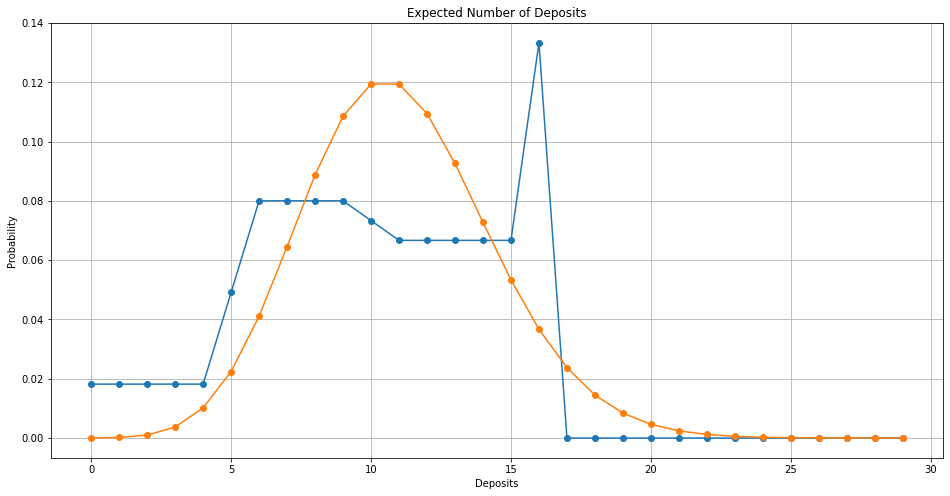

In [24]:
depMean    = Mark3Mean(5,10,16,20,27)
xLst       = range(0,30)
depNumLst  = [x for x in xLst]

#probabilities using Root algorithm, percentiles 5 and 1 not considered
p          = [depProb(x,5,10,16) for x in depNumLst]

# a Poisson distribution is calculated here
ppoisson  = [poisson.pmf(x, 11) for x in xLst]
    
#Mark3Plot(depNumLst,p)
Mark3PlotSeveral(depNumLst, [p, ppoisson])

In [25]:
# test
#sum(p)

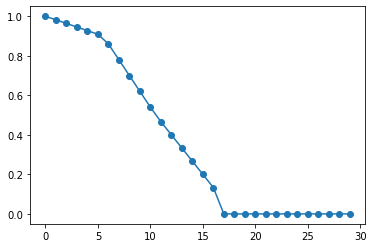

In [26]:
#test

a = []
for i in range(0, len(p)):
    #print(sum(p[i:31]))
    a.append(sum(p[i:31]))
    
plt.plot(depNumLst,a,  marker='o');
 


##  Root et al 1992 Cases

In [27]:
depNumLst  = [x for x in range(0,10)]
p          = [depProb(x,1,2,4) for x in depNumLst]

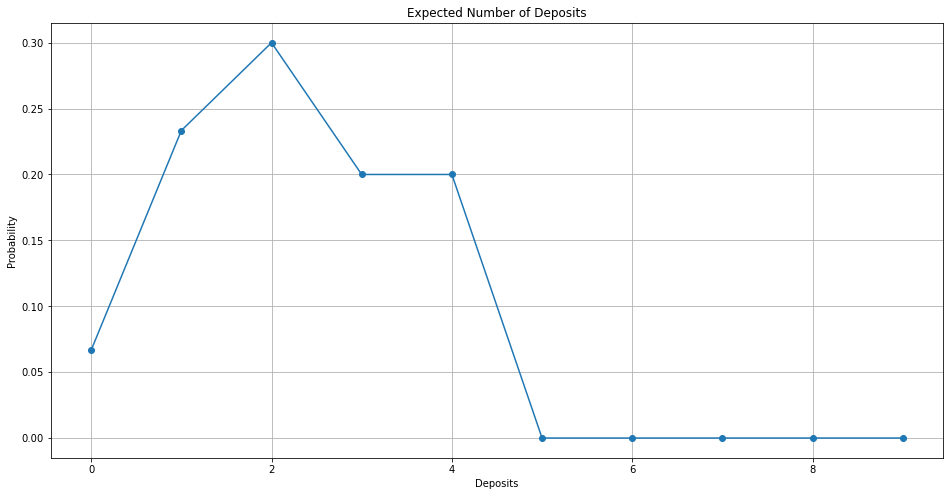

In [28]:
Mark3Plot(depNumLst,p)

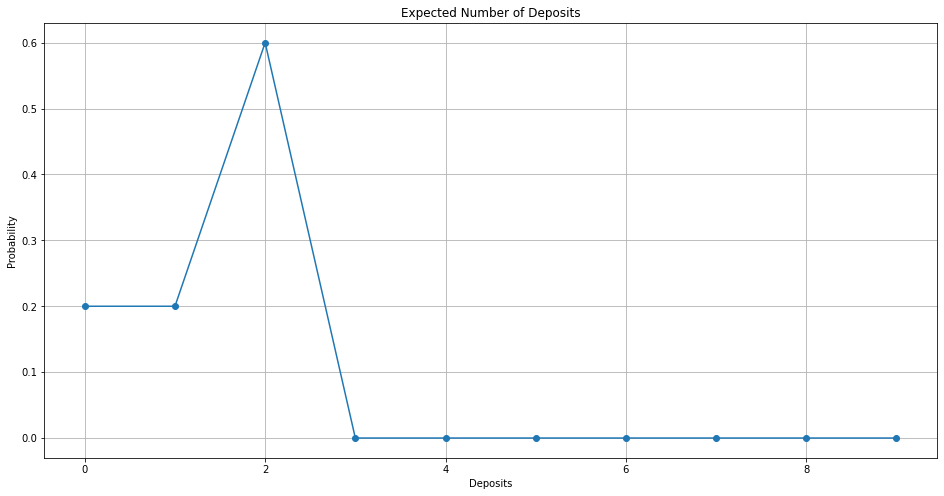

In [29]:
depNumLst  = [x for x in range(0,10)]
p          = [depProb(x,0,2,2) for x in depNumLst]
Mark3Plot(depNumLst,p)

## Track LS04 VMS (USGS, 1996)

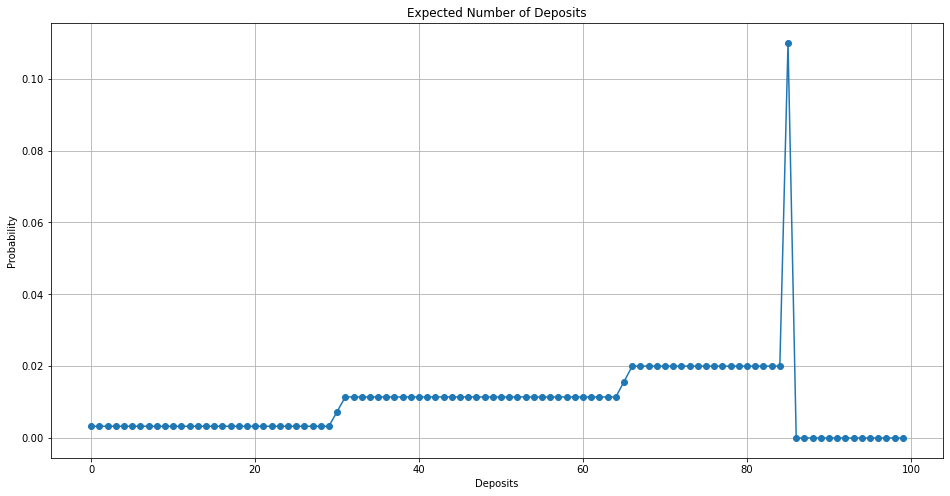

In [39]:
# percentiles 30, 65, and 85

depNumLst  = [x for x in range(0,100)]
p          = [depProb(x,30, 65, 85) for x in depNumLst]

#ppoisson  = [poisson.pmf(x, 27) for x in depNumLst]

#Mark3Plot(depNumLst,p)
Mark3PlotSeveral(depNumLst, [p])